In [285]:
# Important libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from textblob import TextBlob
import sklearn # machine learning model
import re
import requests
import seaborn as sns
from pprint import pprint
sns.set()


In [286]:
def fetch_data(url):
    reponse = requests.get(url)
    data = reponse.json()
    return data

In [287]:
def generate_csv():
    lst = []
    data = fetch_data('https://api.thecatapi.com/v1/breeds')
    for cat in data:
        reference_image_id = cat.get('reference_image_id')
        image_url =   f'https://cdn2.thecatapi.com/images/{reference_image_id}' if  reference_image_id  else ''
        lowest_year, highest_year = cat['life_span'].split(' - ')
        average_year = (int(lowest_year) + int(highest_year)) / 2
        lowest_weight, highest_weight = cat['weight']['metric'].split(' - ')
        average_weight = (int(lowest_weight) + int(highest_weight)) / 2
        dct = {
            "ID": cat['id'],
            "Name": cat['name'],
            "Origin": cat['origin'],
            "Description": cat['description'],
            "Temperament": cat['temperament'],
            "Life Span (years)": average_year,
            "Weight (kg)": average_weight,
            "Image URL": image_url
        }
        lst.append(dct)

        df = pd.DataFrame(lst)
        df.to_csv('cat_breeds.csv', index=False)

## Create CSV from Fetched data

In [288]:
generate_csv()

# Loading Data

In [289]:
df = pd.read_csv('./cat_breeds.csv')

In [290]:
df.head()


,ID,Name,Origin,Description,Temperament,Life Span (years),Weight (kg),Image URL
0,abys,Abyssinian,Egypt,"The Abyssinian is easy to care for, and a joy ...","Active, Energetic, Independent, Intelligent, G...",14.5,4.0,https://cdn2.thecatapi.com/images/0XYvRd7oD
1,aege,Aegean,Greece,Native to the Greek islands known as the Cycla...,"Affectionate, Social, Intelligent, Playful, Ac...",10.5,4.0,https://cdn2.thecatapi.com/images/ozEvzdVM-
2,abob,American Bobtail,United States,American Bobtails are loving and incredibly in...,"Intelligent, Interactive, Lively, Playful, Sen...",13.0,5.0,https://cdn2.thecatapi.com/images/hBXicehMA
3,acur,American Curl,United States,Distinguished by truly unique ears that curl b...,"Affectionate, Curious, Intelligent, Interactiv...",14.0,3.5,https://cdn2.thecatapi.com/images/xnsqonbjW
4,asho,American Shorthair,United States,The American Shorthair is known for its longev...,"Active, Curious, Easy Going, Playful, Calm",16.0,5.5,https://cdn2.thecatapi.com/images/JFPROfGtQ


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 67 non-null     object 
 1   Name               67 non-null     object 
 2   Origin             67 non-null     object 
 3   Description        67 non-null     object 
 4   Temperament        67 non-null     object 
 5   Life Span (years)  67 non-null     float64
 6   Weight (kg)        67 non-null     float64
 7   Image URL          65 non-null     object 
dtypes: float64(2), object(6)
memory usage: 4.3+ KB


In [292]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 67 non-null     object 
 1   Name               67 non-null     object 
 2   Origin             67 non-null     object 
 3   Description        67 non-null     object 
 4   Temperament        67 non-null     object 
 5   Life Span (years)  67 non-null     float64
 6   Weight (kg)        67 non-null     float64
 7   Image URL          65 non-null     object 
dtypes: float64(2), object(6)
memory usage: 4.3+ KB


In [293]:
# How can we find cats with null image url

In [294]:
df.tail()

,ID,Name,Origin,Description,Temperament,Life Span (years),Weight (kg),Image URL
62,tonk,Tonkinese,Canada,"Intelligent and generous with their affection,...","Curious, Intelligent, Social, Lively, Outgoing...",15.0,4.0,https://cdn2.thecatapi.com/images/KBroiVNCM
63,toyg,Toyger,United States,"The Toyger has a sweet, calm personality and i...","Playful, Social, Intelligent",13.5,5.0,https://cdn2.thecatapi.com/images/O3F3_S1XN
64,tang,Turkish Angora,Turkey,This is a smart and intelligent cat which bond...,"Affectionate, Agile, Clever, Gentle, Intellige...",16.5,3.5,https://cdn2.thecatapi.com/images/7CGV6WVXq
65,tvan,Turkish Van,Turkey,"While the Turkish Van loves to jump and climb,...","Agile, Intelligent, Loyal, Playful, Energetic",14.5,6.0,https://cdn2.thecatapi.com/images/sxIXJax6h
66,ycho,York Chocolate,United States,York Chocolate cats are known to be true lap c...,"Playful, Social, Intelligent, Curious, Friendly",14.0,6.5,https://cdn2.thecatapi.com/images/0SxW2SQ_S


In [295]:
df.columns

Index(['ID', 'Name', 'Origin', 'Description', 'Temperament',
       'Life Span (years)', 'Weight (kg)', 'Image URL'],
      dtype='object')

In [296]:
df.shape


(67, 8)

In [297]:
df.describe()

,Life Span (years),Weight (kg)
count,67.000000,67.000000
mean,13.746269,4.708955
std,1.584425,1.066534
min,10.500000,3.000000
25%,13.000000,4.000000
50%,13.500000,4.500000
75%,14.500000,5.500000
max,19.000000,7.500000


In [298]:
df.describe(include='all')

,ID,Name,Origin,Description,Temperament,Life Span (years),Weight (kg),Image URL
count,67,67,67,67,67,67.000000,67.000000,65
unique,67,67,20,67,66,NaN,NaN,65
top,abys,Abyssinian,United States,"The Abyssinian is easy to care for, and a joy ...","Affectionate, Intelligent, Playful, Social",NaN,NaN,https://cdn2.thecatapi.com/images/0XYvRd7oD
freq,1,1,28,1,2,NaN,NaN,1
mean,NaN,NaN,NaN,NaN,NaN,13.746269,4.708955,NaN
std,NaN,NaN,NaN,NaN,NaN,1.584425,1.066534,NaN
min,NaN,NaN,NaN,NaN,NaN,10.500000,3.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,13.000000,4.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,13.500000,4.500000,NaN
75%,NaN,NaN,NaN,NaN,NaN,14.500000,5.500000,NaN


In [299]:
df

,ID,Name,Origin,Description,Temperament,Life Span (years),Weight (kg),Image URL
0,abys,Abyssinian,Egypt,"The Abyssinian is easy to care for, and a joy ...","Active, Energetic, Independent, Intelligent, G...",14.5,4.0,https://cdn2.thecatapi.com/images/0XYvRd7oD
1,aege,Aegean,Greece,Native to the Greek islands known as the Cycla...,"Affectionate, Social, Intelligent, Playful, Ac...",10.5,4.0,https://cdn2.thecatapi.com/images/ozEvzdVM-
2,abob,American Bobtail,United States,American Bobtails are loving and incredibly in...,"Intelligent, Interactive, Lively, Playful, Sen...",13.0,5.0,https://cdn2.thecatapi.com/images/hBXicehMA
3,acur,American Curl,United States,Distinguished by truly unique ears that curl b...,"Affectionate, Curious, Intelligent, Interactiv...",14.0,3.5,https://cdn2.thecatapi.com/images/xnsqonbjW
4,asho,American Shorthair,United States,The American Shorthair is known for its longev...,"Active, Curious, Easy Going, Playful, Calm",16.0,5.5,https://cdn2.thecatapi.com/images/JFPROfGtQ
5,awir,American Wirehair,United States,The American Wirehair tends to be a calm and t...,"Affectionate, Curious, Gentle, Intelligent, In...",16.0,5.5,https://cdn2.thecatapi.com/images/8D--jCd21
6,amau,Arabian Mau,United Arab Emirates,Arabian Mau cats are social and energetic. Due...,"Affectionate, Agile, Curious, Independent, Pla...",13.0,5.5,https://cdn2.thecatapi.com/images/k71ULYfRr
7,amis,Australian Mist,Australia,The Australian Mist thrives on human companion...,"Lively, Social, Fun-loving, Relaxed, Affectionate",14.0,5.0,https://cdn2.thecatapi.com/images/_6x-3TiCA
8,bali,Balinese,United States,"Balinese are curious, outgoing, intelligent ca...","Affectionate, Intelligent, Playful",12.5,3.5,https://cdn2.thecatapi.com/images/13MkvUreZ
9,bamb,Bambino,United States,The Bambino is a breed of cat that was created...,"Affectionate, Lively, Friendly, Intelligent",13.0,3.0,https://cdn2.thecatapi.com/images/5AdhMjeEu


In [300]:
names = df['Name'].values
pprint(names)

array(['Abyssinian', 'Aegean', 'American Bobtail', 'American Curl',
       'American Shorthair', 'American Wirehair', 'Arabian Mau',
       'Australian Mist', 'Balinese', 'Bambino', 'Bengal', 'Birman',
       'Bombay', 'British Longhair', 'British Shorthair', 'Burmese',
       'Burmilla', 'California Spangled', 'Chantilly-Tiffany',
       'Chartreux', 'Chausie', 'Cheetoh', 'Colorpoint Shorthair',
       'Cornish Rex', 'Cymric', 'Cyprus', 'Devon Rex', 'Donskoy',
       'Dragon Li', 'Egyptian Mau', 'European Burmese',
       'Exotic Shorthair', 'Havana Brown', 'Himalayan',
       'Japanese Bobtail', 'Javanese', 'Khao Manee', 'Korat', 'Kurilian',
       'LaPerm', 'Maine Coon', 'Malayan', 'Manx', 'Munchkin', 'Nebelung',
       'Norwegian Forest Cat', 'Ocicat', 'Oriental', 'Persian',
       'Pixie-bob', 'Ragamuffin', 'Ragdoll', 'Russian Blue', 'Savannah',
       'Scottish Fold', 'Selkirk Rex', 'Siamese', 'Siberian', 'Singapura',
       'Snowshoe', 'Somali', 'Sphynx', 'Tonkinese', 'Toyger',


In [301]:
countries = df['Origin']
countries

0                    Egypt
1                   Greece
2            United States
3            United States
4            United States
5            United States
6     United Arab Emirates
7                Australia
8            United States
9            United States
10           United States
11                  France
12           United States
13          United Kingdom
14          United Kingdom
15                   Burma
16          United Kingdom
17           United States
18           United States
19                  France
20                   Egypt
21           United States
22           United States
23          United Kingdom
24                  Canada
25                  Cyprus
26          United Kingdom
27                  Russia
28                   China
29                   Egypt
30                   Burma
31           United States
32          United Kingdom
33           United States
34                   Japan
35           United States
36                Thailand
3

In [302]:
sorted_values = df.groupby('Origin')['Origin'].value_counts().sort_values()

In [303]:
sorted_values

Origin
Australia                1
United Arab Emirates     1
Somalia                  1
Singapore                1
Norway                   1
Japan                    1
Iran (Persia)            1
Isle of Man              1
Cyprus                   1
China                    1
Greece                   1
France                   2
Turkey                   2
Burma                    2
Egypt                    3
Canada                   3
Russia                   4
Thailand                 4
United Kingdom           8
United States           28
Name: count, dtype: int64

In [304]:
countries = sorted_values.index

In [305]:
countries

Index(['Australia', 'United Arab Emirates', 'Somalia', 'Singapore', 'Norway',
       'Japan', 'Iran (Persia)', 'Isle of Man', 'Cyprus', 'China', 'Greece',
       'France', 'Turkey', 'Burma', 'Egypt', 'Canada', 'Russia', 'Thailand',
       'United Kingdom', 'United States'],
      dtype='object', name='Origin')

In [306]:
values = sorted_values.values
values

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  3,  3,  4,
        4,  8, 28], dtype=int64)

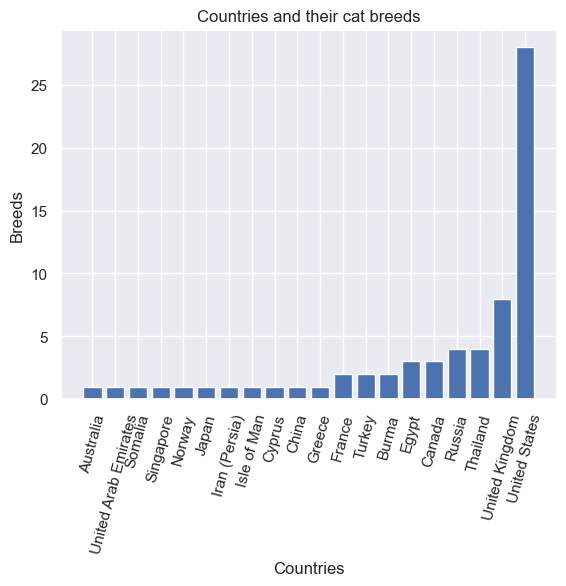

In [307]:
plt.bar(countries, values)
plt.xlabel('Countries')
plt.ylabel('Breeds')
plt.title('Countries and their cat breeds')
plt.xticks(rotation=75)
plt.show()

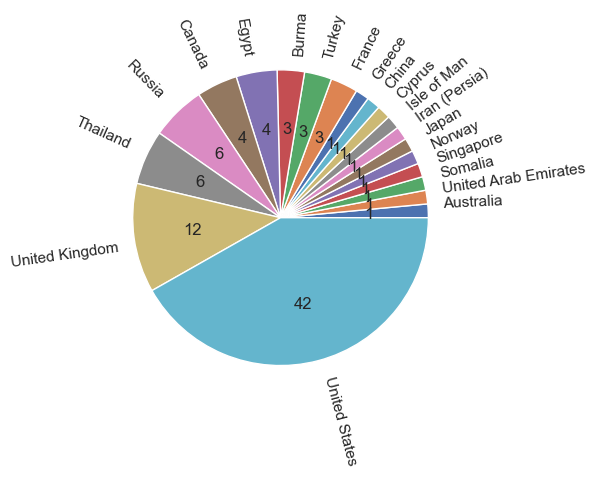

In [308]:


fig, ax = plt.subplots()
ax.pie(values,  labels=countries, autopct='%1.0f', rotatelabels=True)
plt.show()

In [309]:
pd.set_option('display.max_rows',100)

In [310]:
df['Image URL']

0      https://cdn2.thecatapi.com/images/0XYvRd7oD
1      https://cdn2.thecatapi.com/images/ozEvzdVM-
2      https://cdn2.thecatapi.com/images/hBXicehMA
3      https://cdn2.thecatapi.com/images/xnsqonbjW
4      https://cdn2.thecatapi.com/images/JFPROfGtQ
5      https://cdn2.thecatapi.com/images/8D--jCd21
6      https://cdn2.thecatapi.com/images/k71ULYfRr
7      https://cdn2.thecatapi.com/images/_6x-3TiCA
8      https://cdn2.thecatapi.com/images/13MkvUreZ
9      https://cdn2.thecatapi.com/images/5AdhMjeEu
10     https://cdn2.thecatapi.com/images/O3btzLlsO
11     https://cdn2.thecatapi.com/images/HOrX5gwLS
12     https://cdn2.thecatapi.com/images/5iYq9NmT1
13     https://cdn2.thecatapi.com/images/7isAO4Cav
14     https://cdn2.thecatapi.com/images/s4wQfYoEk
15     https://cdn2.thecatapi.com/images/4lXnnfxac
16     https://cdn2.thecatapi.com/images/jvg3XfEdC
17     https://cdn2.thecatapi.com/images/B1ERTmgph
18     https://cdn2.thecatapi.com/images/TR-5nAd_S
19     https://cdn2.thecatapi.c

In [311]:
df[df['Image URL'].isnull()]

,ID,Name,Origin,Description,Temperament,Life Span (years),Weight (kg),Image URL
30,ebur,European Burmese,Burma,"The European Burmese is a very affectionate, i...","Sweet, Affectionate, Loyal",12.5,4.5,NaN
41,mala,Malayan,United Kingdom,Malayans love to explore and even enjoy travel...,"Affectionate, Interactive, Playful, Social",15.0,4.5,NaN


In [312]:
"""
id, name, origin, life_span, weight

"""

'\nid, name, origin, life_span, weight\n\n'

In [313]:
cat_small_data = df[['ID', 'Name', 'Origin', 'Life Span (years)', 'Weight (kg)']]

In [314]:
cat_small_data

,ID,Name,Origin,Life Span (years),Weight (kg)
0,abys,Abyssinian,Egypt,14.5,4.0
1,aege,Aegean,Greece,10.5,4.0
2,abob,American Bobtail,United States,13.0,5.0
3,acur,American Curl,United States,14.0,3.5
4,asho,American Shorthair,United States,16.0,5.5
5,awir,American Wirehair,United States,16.0,5.5
6,amau,Arabian Mau,United Arab Emirates,13.0,5.5
7,amis,Australian Mist,Australia,14.0,5.0
8,bali,Balinese,United States,12.5,3.5
9,bamb,Bambino,United States,13.0,3.0


In [315]:
# cat_small_data.to_csv('cat_small_data.csv')

In [316]:
weigth = df['Weight (kg)'].values
life_span = df['Life Span (years)'].values

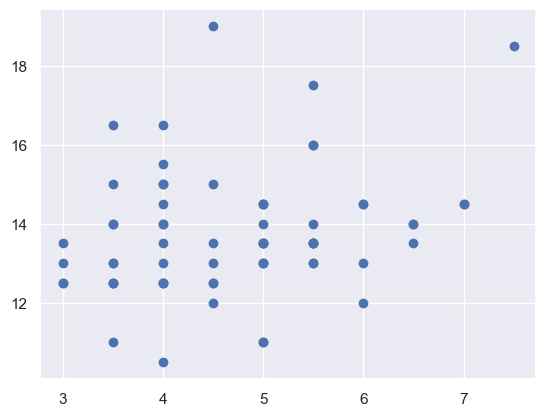

In [317]:
plt.scatter(weigth, life_span)
plt.show()

In [318]:
df[['Weight (kg)', 'Life Span (years)']].corr()

,Weight (kg),Life Span (years)
Weight (kg),1.000000,0.256006
Life Span (years),0.256006,1.000000


In [319]:
df[df['Life Span (years)'] > 15]

,ID,Name,Origin,Description,Temperament,Life Span (years),Weight (kg),Image URL
4,asho,American Shorthair,United States,The American Shorthair is known for its longev...,"Active, Curious, Easy Going, Playful, Calm",16.0,5.5,https://cdn2.thecatapi.com/images/JFPROfGtQ
5,awir,American Wirehair,United States,The American Wirehair tends to be a calm and t...,"Affectionate, Curious, Gentle, Intelligent, In...",16.0,5.5,https://cdn2.thecatapi.com/images/8D--jCd21
15,bure,Burmese,Burma,"Burmese love being with people, playing with t...","Curious, Intelligent, Gentle, Social, Interact...",15.5,4.0,https://cdn2.thecatapi.com/images/4lXnnfxac
29,emau,Egyptian Mau,Egypt,The Egyptian Mau is gentle and reserved. She l...,"Agile, Dependent, Gentle, Intelligent, Lively,...",19.0,4.5,https://cdn2.thecatapi.com/images/TuSyTkt2n
38,kuri,Kurilian,Russia,The character of the Kurilian Bobtail is indep...,"Independent, highly intelligent, clever, inqui...",17.5,5.5,https://cdn2.thecatapi.com/images/NZpO4pU56M
53,sava,Savannah,United States,Savannah is the feline version of a dog. Activ...,"Curious, Social, Intelligent, Loyal, Outgoing,...",18.5,7.5,https://cdn2.thecatapi.com/images/a8nIYvs6S
59,snow,Snowshoe,United States,"The Snowshoe is a vibrant, energetic, affectio...","Affectionate, Social, Intelligent, Sweet-tempered",16.5,4.0,https://cdn2.thecatapi.com/images/MK-sYESvO
64,tang,Turkish Angora,Turkey,This is a smart and intelligent cat which bond...,"Affectionate, Agile, Clever, Gentle, Intellige...",16.5,3.5,https://cdn2.thecatapi.com/images/7CGV6WVXq


In [320]:
df[(df['Life Span (years)'] > 15) & (df['Weight (kg)'] > 5)]

,ID,Name,Origin,Description,Temperament,Life Span (years),Weight (kg),Image URL
4,asho,American Shorthair,United States,The American Shorthair is known for its longev...,"Active, Curious, Easy Going, Playful, Calm",16.0,5.5,https://cdn2.thecatapi.com/images/JFPROfGtQ
5,awir,American Wirehair,United States,The American Wirehair tends to be a calm and t...,"Affectionate, Curious, Gentle, Intelligent, In...",16.0,5.5,https://cdn2.thecatapi.com/images/8D--jCd21
38,kuri,Kurilian,Russia,The character of the Kurilian Bobtail is indep...,"Independent, highly intelligent, clever, inqui...",17.5,5.5,https://cdn2.thecatapi.com/images/NZpO4pU56M
53,sava,Savannah,United States,Savannah is the feline version of a dog. Activ...,"Curious, Social, Intelligent, Loyal, Outgoing,...",18.5,7.5,https://cdn2.thecatapi.com/images/a8nIYvs6S


In [321]:
df[(df['Life Span (years)'] > 15) & (df['Weight (kg)'] > 5) & (df['Origin'] == 'United States')]

,ID,Name,Origin,Description,Temperament,Life Span (years),Weight (kg),Image URL
4,asho,American Shorthair,United States,The American Shorthair is known for its longev...,"Active, Curious, Easy Going, Playful, Calm",16.0,5.5,https://cdn2.thecatapi.com/images/JFPROfGtQ
5,awir,American Wirehair,United States,The American Wirehair tends to be a calm and t...,"Affectionate, Curious, Gentle, Intelligent, In...",16.0,5.5,https://cdn2.thecatapi.com/images/8D--jCd21
53,sava,Savannah,United States,Savannah is the feline version of a dog. Activ...,"Curious, Social, Intelligent, Loyal, Outgoing,...",18.5,7.5,https://cdn2.thecatapi.com/images/a8nIYvs6S
